In [46]:
# Jonathan Plavnik, CMOR220, Fall 2025, Project 7
# project7_SVD.ipynb
# Singular value decomp, best rank approx, Data compressiong using built in
# numpy and manual methods. All preformed on "Image.jpg" provided
# by Dr. Protasov
# Last modified: November 11, 2025

# Imports
import matplotlib.pyplot as plt
import numpy as np
import math

In [47]:
# save image, necessary processing

O = plt.imread("image.jpg")
O = O / 255
#plt.imshow(O)

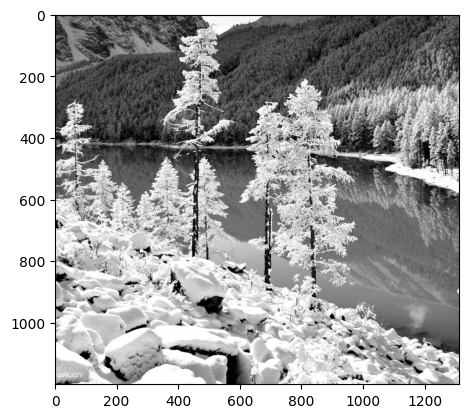

In [48]:
# grayscale, initialize A
A = 0.2989 * O[:, :, 0] + 0.5870 * O[:, :, 1] + 0.1140 * O[:, :, 2]
plt.imshow(A, cmap='gray')


In [49]:
# SVD of A

def SVDdecomp(A):
  # list of inputs: matrix A, which is greyscale of image.jpy
  # list of outputs: orthogonal matrix U size nxn, rectangular diagonal matrix of singular values D, orthgonal matrix V size mxm

  # compute SVD
  [U, D, V] = np.linalg.svd(A)

  # Define a full matrix Dfull
  Dfull = np.zeros(np.shape(A)) # Need to match dimensions based on matrix mult
  for i in range(len(D)):
    Dfull[i,i] = D[i] # Set up values along diagonal
  return U, Dfull, V


[U, Dfull, V] = SVDdecomp(A)


In [50]:
# Check correctness of SVD
np.allclose(A, U@Dfull@V) # @ is matrix mult in Python!

True

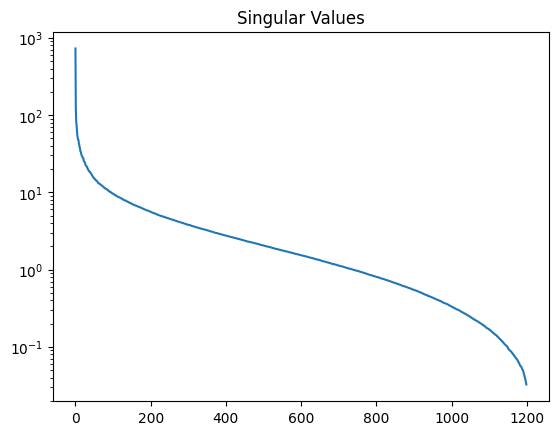

In [51]:
# Plot singular values of Df
plt.figure()
plt.title('Singular Values')
plt.plot(np.diag(Dfull))
plt.yscale("log")
plt.show()


In [52]:
# function

def compress(A, factor):
  # list of inputs: A image matrix, factor compression factor
  # list of outputs: image matrix compressed using approx rank r

  # Get r and decompose A
  N = min(np.shape(A)[0], np.shape(A)[1])
  r = int(N / factor)
  [U, Dfull, V] = SVDdecomp(A)

  # manipulate U,D,V using rank value of r to get Ar
  Ur = U[:, :r]
  Vr = V[:r, :]
  Dr = Dfull[:r, :r]
  Ar = Ur@Dr@Vr
  Ar = np.clip(Ar, 0, 1)

  return Ar



(np.float64(-0.5), np.float64(1312.5), np.float64(1199.5), np.float64(-0.5))

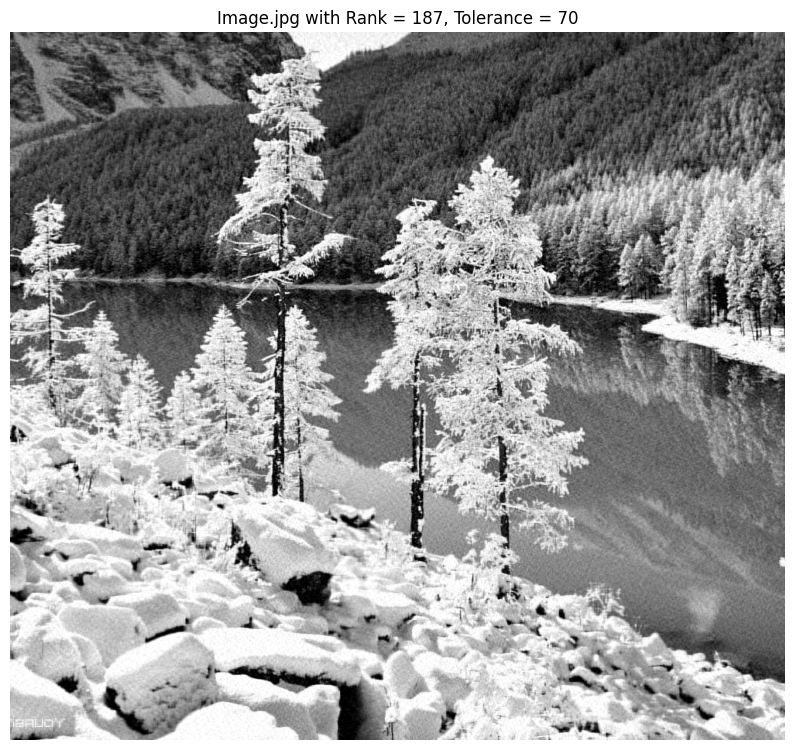

In [53]:
# compute best r rank approx for tol = 70

# preprocessing and intiailizing to set up error finding loop
tolerance = 70
[U, D, V] = np.linalg.svd(A)
rank = 0
D = D**2
error = 0
length = len(D)


# iterate through singular values until sum of squares is above tol^2
while(error < tolerance**2):
  error += D[length-rank-1]
  rank += 1

r = length - rank + 1 # add back one to adjust for while loop overshoot

# same processing to find Ar

Ur = U[:, :r]
Vr = V[:r, :]
Dr = Dfull[:r, :r]
Ar = Ur@Dr@Vr
Ar = np.clip(Ar, 0, 1)


# Display best rank approximation

plt.figure(figsize=(10,10))
plt.imshow(Ar, cmap='gray')
plt.title(f'Image.jpg with Rank = {r}, Tolerance = {tolerance}')
plt.axis('off')


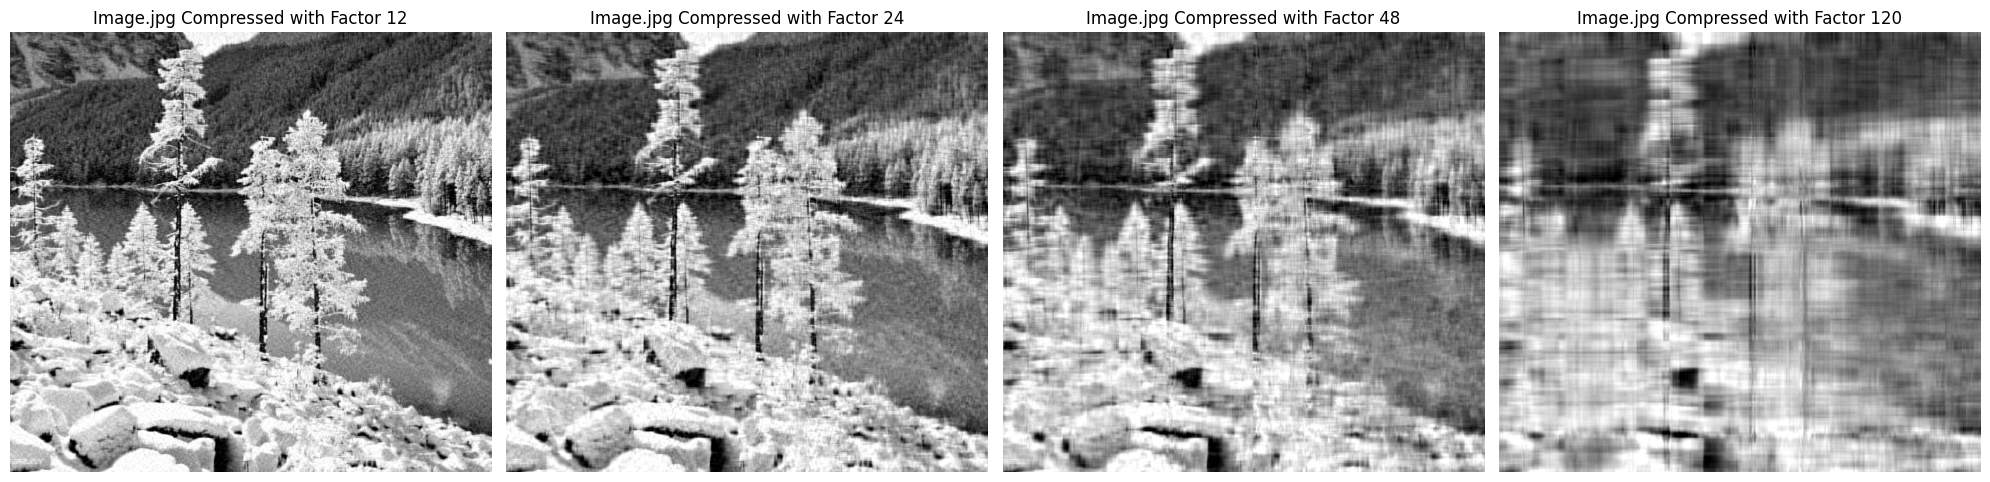

In [54]:
# compute best r rank approx for tol = 70

# generate subplot using compress method from earlier given compression factors,
# replicated four times with different factors

factors = [12, 24, 48, 120]
fig, axes = plt.subplots(1, 4, figsize=(20, 6))


# 4 subplots side by side to circumvent issues publishing to pdf using google
# colab

for i, factor in enumerate(factors):
    axes[i].imshow(compress(A, factor), cmap='gray')
    axes[i].set_title(f'Image.jpg Compressed with Factor {factor}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()






In [55]:
print("end of project")


end of project
